In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re
import numpy as np

In [2]:
#构建一个drugid 和drug name的字典
dc = pd.read_csv('../synergyy/data/synergy_data/DrugComb/drugcomb_trueset_NoDup.csv')
def split_it(compound):
    return int(re.split('\d*\D+',compound)[1])
dc['compound0_x'] = dc['compound0_x'].apply(lambda x: split_it(x))
dc['compound0_y'] = dc['compound0_y'].apply(lambda x: split_it(x))
drugID = list(dc['compound0_x']) + list(dc['compound0_y'])
drugName = list(dc['drug_row']) + list(dc['drug_col'])
DBID_to_Name= dict(zip(drugID, drugName))


prediction = pd.read_csv("../synergyy/results/predicts_transynergy_liu_Customized.txt")
processed = pd.read_csv("../synergyy/results/processed_synergydf_Customized.csv")
processed.columns = ['index','drug1','drug2','cell','score']
m = pd.merge(prediction,processed,on="index")
m = m[m['drug2'] == 9053]
#//
m['drug1_Name'] = m['drug1'].map(DBID_to_Name) 
m['drug2_Name'] = m['drug2'].map(DBID_to_Name)
m

,Unnamed: 0,index,actuals,predicts_transynergy_liu,drug1,drug2,cell,score,drug1_Name,drug2_Name
0,0,2213.0,1.0,0.239864,5983,9053,OCI-LY1_GCB_EL010,9.4245,Bardoxolone methyl,Ibrutinib
1,1,3868.0,0.0,0.221389,6080,9053,NU-DHL1_GCB_EL017,-36.0835,Linifanib,Ibrutinib
2,2,5127.0,0.0,0.261368,11800,9053,U2932_ABC_EL022,-20.2385,Tivozanib,Ibrutinib
3,3,368.0,0.0,0.285377,8820,9053,DB_GCB_EL002,-23.2260,Ivacaftor,Ibrutinib
5,5,3550.0,0.0,0.184634,357,9053,SUDHL10_GCB_EL016,-12.9920,aminoglutethimide,Ibrutinib
...,...,...,...,...,...,...,...,...,...,...
6455,6455,5903.0,1.0,0.162545,210,9053,RL_GCB_EL026,4.8925,ADAPALENE,Ibrutinib
6456,6456,4682.0,0.0,0.278550,12302,9053,SUDHL6_GCB_EL020,-24.4845,CP-724714,Ibrutinib
6457,6457,5645.0,0.0,0.474049,12731,9053,HLY1_ABC_EL024,-0.9910,Daporinad,Ibrutinib
6458,6458,492.0,0.0,0.244637,482,9053,DOHH2_GCB_EL003,-10.7160,celecoxib,Ibrutinib


## global intepretation

In [3]:
shap = pd.read_csv("../synergyy/results/shap_df_transynergy_liu_0.3088_Customized_withshapleygenescells.txt")
m_shap = pd.merge(m,shap,on="index")
m_shap

,Unnamed: 0_x,index,actuals,predicts_transynergy_liu,drug1,drug2,cell_x,score,drug1_Name,drug2_Name,...,d2tg,d1fp,d2fp,cell_y,d1tg_score,d1tg_gene,d2tg_score,d2tg_gene,cell_score,cell_gene
0,0,2213.0,1.0,0.239864,5983,9053,OCI-LY1_GCB_EL010,9.4245,Bardoxolone methyl,Ibrutinib,...,0.010582,0.033187,0.004083,-0.065755,[0.02192621 0.01121615 0.00953267 0.00567061 0...,[ 4792 9429 4363 1576 1577 2908 5467 2...,[0.01672475 0.01016496 0.00885941 0.00848005 0...,[ 2066 5607 2241 640 3702 9113 1445 ...,[0.00355499 0.00254732 0.00145626 0.00143276 0...,[ 974 3512 962 4536 54504 4493 11...
1,1,3868.0,0.0,0.221389,6080,9053,NU-DHL1_GCB_EL017,-36.0835,Linifanib,Ibrutinib,...,0.073281,0.012986,-0.009313,-0.072167,[0.00253313 0.00251214 0.00212307 0.00194304 0...,[ 4921 29904 5293 5590 55589 27 4...,[0.02418897 0.01525861 0.01137039 0.01072615 0...,[ 2066 5607 9113 2263 640 3702 2241 50...,[0.00625668 0.00521317 0.00346794 0.00271254 0...,[ 962 974 8001 4536 930 912 3...
2,2,5127.0,0.0,0.261368,11800,9053,U2932_ABC_EL022,-20.2385,Tivozanib,Ibrutinib,...,0.040706,0.044398,-0.064415,-0.081905,[0.00843894 0.00615663 0.00600284 0.00592582 0...,[ 2247 2066 4921 8536 5604 10298 1453 94...,[0.02245882 0.01580009 0.01249338 0.01167668 0...,[ 2066 5607 2241 9113 640 2263 3702 50...,[0.00257698 0.00228793 0.00211992 0.00186201 0...,[ 2882 912 962 974 1364 596 4493 10...
3,3,368.0,0.0,0.285377,8820,9053,DB_GCB_EL002,-23.2260,Ivacaftor,Ibrutinib,...,0.070482,-0.023454,-0.033381,-0.048111,[0.00623853 0.00529177 0.00526068 0.00481809 0...,[ 2534 7364 4088 2908 4128 367 7...,[0.01705492 0.00825285 0.00805464 0.00795527 0...,[ 2066 640 3702 1445 2241 367 5...,[0.00550679 0.00377582 0.00353341 0.00183061 0...,[ 974 962 973 54518 7045 8614 4536 11...
4,5,3550.0,0.0,0.184634,357,9053,SUDHL10_GCB_EL016,-12.9920,aminoglutethimide,Ibrutinib,...,0.012925,-0.020485,-0.047211,0.022391,[0.00609038 0.00463872 0.00460891 0.00444122 0...,[ 1583 5376 3757 3417 28234 51053 1...,[0.01473796 0.00676908 0.0062369 0.00521206 0...,[ 2066 640 3702 2241 2444 27 5607 898...,[0.00140848 0.00137014 0.00105623 0.00101384 0...,[ 962 4493 10242 5270 3932 55214 26191 13...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6137,6455,5903.0,1.0,0.162545,210,9053,RL_GCB_EL026,4.8925,ADAPALENE,Ibrutinib,...,-0.004844,-0.041970,-0.033981,-0.062936,[0.01992248 0.01948828 0.01209011 0.00802117 0...,[ 1139 3315 2805 7097 6256 641 4...,[0.01886259 0.00895267 0.00890111 0.00872407 0...,[ 2066 2444 7006 1445 2241 640 3702 6...,[0.00347813 0.00293716 0.00248173 0.00220347 0...,[ 974 962 64005 4493 4539 6696 4508 45...
6138,6456,4682.0,0.0,0.278550,12302,9053,SUDHL6_GCB_EL020,-24.4845,CP-724714,Ibrutinib,...,0.052060,0.025459,-0.045462,-0.094249,[0.00383225 0.00364855 0.00316763 0.00290425 0...,[ 4921 5597 5566 9113 55589 5290 1...,[0.02697543 0.01933773 0.01594841 0.01488721 0...,[ 2066 5607 2263 640 5004 9113 613 24...,[0.00295227 0.00276476 0.00276035 0.00222234 0...,[ 962 3512 974 64005 4493 4508 933 257...
6139,6457,5645.0,0.0,0.474049,12731,9053,HLY1_ABC_EL024,-0.9910,Daporinad,Ibrutinib,...,-0.045527,-0.020639,-0.034470,0.006745,[0.01885638 0.01296385 0.01194185 0.01176532 0...,[10135 1576 10599 1577 7153 7150 81027 15...,[0.01681633 0.00725953 0.00670707 0.00666793 0...,[ 2066 9113 5607 640 3702 5004 367 14...,[0.00158942 0.0014764 0.00137876 0.00129769 0...,[ 7278 4602 5294 7133 8406 2947 2...
6140,6458,492.0,0.0,0.244637,482,9053,DOHH2_GCB_EL003,-10.7160,celecoxib,Ibrutinib,...,-0.063298,0.000756,-0.024804,-0.022769,[0.00925287 0.00878264 0.008092 0.00793084 0...,[ 9536 1009 11069 239 4088 377677 4...,[0.0227322 0.01375591 0.01236965 0.01200035 0...,[ 2066 2444 2263 5004 640 3702 2241 3...,[0.00273111 0.00270905 0.00230563 0.00180883 0...,[ 973 3512 962 26191 54518 3127 ...


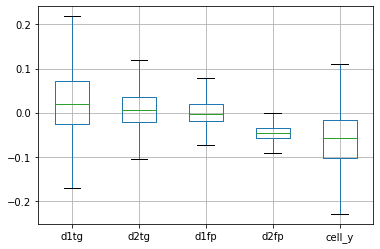

In [4]:
#
# sns.violinplot(data=m,x='actuals',y='predicts_transynergy_liu',hue='actuals')
m_shap.boxplot(column=['d1tg', 'd2tg', 'd1fp','d2fp','cell_y'],showfliers=False)  

In [5]:
#multivariate regresssion
from sklearn import linear_model
model_ols =  linear_model.Ridge(alpha= 35)
X = m_shap[['d1tg', 'd2tg', 'd1fp','d2fp','cell_y']]
y = m_shap[['predicts_transynergy_liu']]
model_ols.fit(X, y)




Ridge(alpha=35)

In [6]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [[0.55328362 0.26803609 0.24185915 0.04662489 0.2458599 ]]
intercept=  [0.24564281]


SpearmanrResult(correlation=0.6524165862793648, pvalue=0.0)

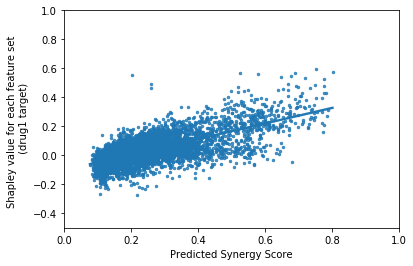

In [7]:
ax = sns.regplot(data=m_shap,x='predicts_transynergy_liu',y='d1tg',ci=95,\
                 scatter_kws={'s':6})
ax.set_ylim(-0.5,1)
ax.set_xlim(0,1)
ax.set(xlabel='Predicted Synergy Score', ylabel='Shapley value for each feature set \n (drug1 target)')
stats.spearmanr(m_shap['predicts_transynergy_liu'], m_shap['d1tg'], axis=None)


SpearmanrResult(correlation=0.3737142073027295, pvalue=7.388217055406465e-203)

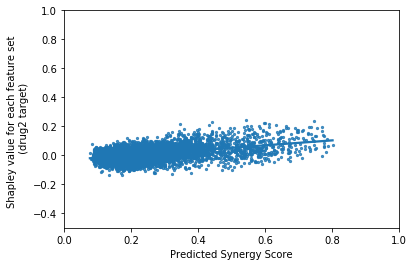

In [8]:
ax = sns.regplot(data=m_shap,x='predicts_transynergy_liu',y='d2tg',ci=95,\
                 scatter_kws={'s':5})
ax.set_ylim(-0.5,1)
ax.set_xlim(0,1)
ax.set(xlabel='Predicted Synergy Score', ylabel='Shapley value for each feature set \n (drug2 target)')
stats.spearmanr(m_shap['predicts_transynergy_liu'], m_shap['d2tg'], axis=None)


SpearmanrResult(correlation=0.3394890741812332, pvalue=1.6268902001680123e-165)

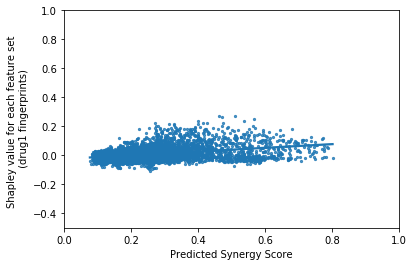

In [9]:
ax = sns.regplot(data=m_shap,x='predicts_transynergy_liu',y='d1fp',ci=95,\
                 scatter_kws={'s':5})
ax.set_ylim(-0.5,1)
ax.set_xlim(0,1)
ax.set(xlabel='Predicted Synergy Score', ylabel='Shapley value for each feature set \n (drug1 fingerprints)')
stats.spearmanr(m_shap['predicts_transynergy_liu'], m_shap['d1fp'], axis=None)


SpearmanrResult(correlation=0.10890612967002469, pvalue=1.1404606258570608e-17)

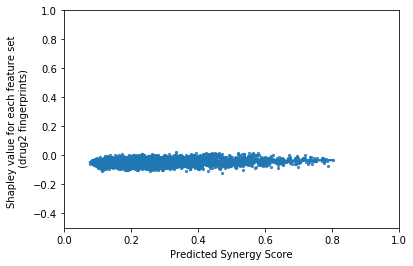

In [10]:
ax = sns.regplot(data=m_shap,x='predicts_transynergy_liu',y='d2fp',ci=95,\
                 scatter_kws={'s':5})
ax.set_ylim(-0.5,1)
ax.set_xlim(0,1)
ax.set(xlabel='Predicted Synergy Score', ylabel='Shapley value for each feature set \n (drug2 fingerprints)')
stats.spearmanr(m_shap['predicts_transynergy_liu'], m_shap['d2fp'], axis=None)


SpearmanrResult(correlation=0.1847714931729123, pvalue=2.6611121377365214e-48)

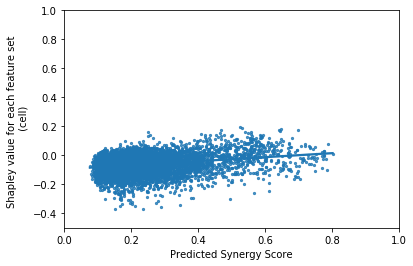

In [11]:
ax = sns.regplot(data=m_shap,x='predicts_transynergy_liu',y='cell_y',ci=95,\
                 scatter_kws={'s':5})
ax.set_ylim(-0.5,1)
ax.set_xlim(0,1)
ax.set(xlabel='Predicted Synergy Score', ylabel='Shapley value for each feature set \n (cell)')
stats.spearmanr(m_shap['predicts_transynergy_liu'], m_shap['cell_y'], axis=None)

### local intepretation

In [100]:
m_shap_cdk46 = m_shap[m_shap['drug1'] == 8911] #9073palbociclib #12731NAMPT #8911trametinib
m_shap_cdk46

,Unnamed: 0_x,index,actuals,predicts_transynergy_liu,drug1,drug2,cell_x,score,drug1_Name,drug2_Name,...,d2tg,d1fp,d2fp,cell_y,d1tg_score,d1tg_gene,d2tg_score,d2tg_gene,cell_score,cell_gene
55,57,2978.0,0.0,0.777423,8911,9053,OCI-LY8_GCB_EL013,-12.2105,Trametinib,Ibrutinib,...,0.064788,0.045988,-0.037868,-0.002562,[0.02559886 0.02257073 0.01060585 0.00686815 0...,[ 5604 5605 4363 7150 5788 4780 5594 47...,[0.0214578 0.01279144 0.01048727 0.00952714 0...,[ 2066 5004 640 2263 613 5607 2241 50...,[0.00309223 0.00234664 0.0022013 0.00204453 0...,[ 4493 6693 3914 444 92241 4539 3109 78...
101,105,1798.0,0.0,0.639186,8911,9053,OCI-LY10_ABC_EL008,-12.2105,Trametinib,Ibrutinib,...,0.148708,0.001500,-0.052476,0.009141,[0.02043953 0.02016729 0.01007034 0.00857931 0...,[ 5605 5604 1558 4780 10599 4363 51...,[0.01779406 0.01264094 0.01129473 0.01099913 0...,[ 2066 613 2241 1445 5607 5979 2444 3...,[0.0096629 0.00510558 0.00468781 0.00433955 0...,[ 894 4493 3586 2882 3914 1303 4242 9...
219,236,6046.0,0.0,0.751864,8911,9053,RL_GCB_EL026,-12.2105,Trametinib,Ibrutinib,...,0.047905,0.021220,-0.041146,0.009870,[0.02308108 0.01406377 0.01304288 0.01211662 0...,[ 5604 7084 2740 8202 4363 11201 8648 15...,[0.02210681 0.01314169 0.01167152 0.01099132 0...,[ 2066 5607 2241 640 2908 5004 9...,[0.00425759 0.00308153 0.00239006 0.00232598 0...,[ 974 4493 64005 2882 962 3914 3...
279,301,4630.0,0.0,0.775457,8911,9053,SUDHL6_GCB_EL020,-12.2105,Trametinib,Ibrutinib,...,0.082765,0.067234,-0.040867,0.030836,[0.04129058 0.02812657 0.01206174 0.01166694 0...,[ 5604 5605 4363 4780 1558 10599 11...,[0.02212707 0.01196609 0.01121046 0.01117031 0...,[ 2066 5004 640 5607 2241 9113 2...,[0.00595765 0.00488852 0.00407961 0.0034344 0...,[ 974 962 4493 64005 1364 3914 3...
453,486,854.0,0.0,0.741989,8911,9053,FARAGE_GCB_EL004,-12.2105,Trametinib,Ibrutinib,...,0.116472,0.009372,-0.057109,-0.008612,[0.01583997 0.01255189 0.00983394 0.00915931 0...,[ 5604 5605 4780 7084 11201 328 2...,[0.02202899 0.0174439 0.01108583 0.01106176 0...,[ 2066 5607 2241 9113 640 4780 2...,[0.00378284 0.00281437 0.00263597 0.0025412 0...,[ 4493 962 5552 3586 3914 3932 2...
519,553,4866.0,0.0,0.716171,8911,9053,SUDHL16_GCB_EL021,-12.2105,Trametinib,Ibrutinib,...,0.106846,0.058936,-0.018823,-0.031295,[0.03079143 0.01725053 0.01657974 0.01323247 0...,[ 5604 7150 5605 10599 81027 7153 7277 65...,[0.02685361 0.01780849 0.013892 0.01329928 0...,[ 2066 5607 640 5004 2241 9113 4780 37...,[0.00497008 0.00489719 0.00395683 0.0032452 0...,[ 912 974 4493 3586 ...
575,613,1562.0,0.0,0.728177,8911,9053,KARPAS_422_GCB_EL007,-12.2105,Trametinib,Ibrutinib,...,0.156269,0.050209,-0.058446,0.003958,[0.01771998 0.01517619 0.01170748 0.00975947 0...,[ 5604 5605 4363 4780 5788 2740 151 54...,[0.01985739 0.01500651 0.01320994 0.01181091 0...,[ 2066 613 5607 5004 2241 640 1...,[0.00392795 0.00311525 0.00273657 0.00263789 0...,[ 4493 3127 3914 1917 2882 9123 4539 66...
696,738,2034.0,0.0,0.769051,8911,9053,OCI-LY18_GCB_EL009,-12.2105,Trametinib,Ibrutinib,...,0.192578,0.043762,-0.038237,-0.002610,[0.03071753 0.02268635 0.01096703 0.01031212 0...,[ 5604 5605 10599 5467 8654 2740 ...,[0.01829941 0.01228427 0.01219351 0.00971267 0...,[ 2066 2241 5607 9113 1445 5979 ...,[0.00446338 0.00369202 0.0032843 0.00299932 0...,[ 3512 974 596 10631 4162 3127 4493 31...
796,844,6518.0,0.0,0.555445,8911,9053,LY3_ABC_EL028,-12.2105,Trametinib,Ibrutinib,...,0.072454,0.065741,-0.019829,-0.121242,[0.02578508 0.01310445 0.01269852 0.01250479 0...,[ 5604 7084 3309 51231 4780 3094 3177 29...,[0.02364564 0.01524137 0.01187725 0.01180588 0...,[ 2066 5607 640 9113 3702 2241 5...,[0.0071993 0.00688594 0.00553009 0.00436931 0...,[ 974 3586 894 962 4508 64005 ...
801,849,3450.0,0.0,0.787402,8911,9053,RIVA_ABC_EL015,-12.2105,Trametinib,Ibrutinib,...,0.064626,0.053910,-0.073579,0.078165,[0.03721699 0.02697436 0.01770248 0.01391028 0...,[ 5604 7084 3094 23411 5605 3177 10599 48...,[0.01702605 0.00954632 0.0087479 0.00795292 0...,[ 2066 2241 640 9113 

[Text(0, 0.5, 'Drug library'), Text(0.5, 0, 'Predicted Synergy Score')]

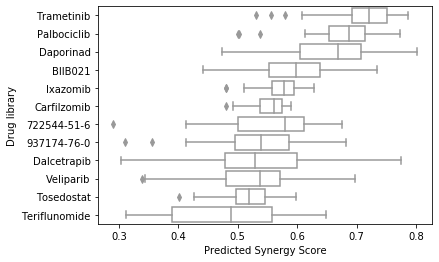

In [101]:
# plot highly predicted drugs
highly_predicted_drugs = m_shap.groupby("drug1_Name").predicts_transynergy_liu.agg(["mean"]).\
rename(columns="{}_of_drug1".format).\
sort_values("mean_of_drug1", ascending=False).head(12).index

ax = sns.boxplot(data=m_shap[m_shap.drug1_Name.isin(highly_predicted_drugs)],\
            y='drug1_Name',x='predicts_transynergy_liu',\
           order = highly_predicted_drugs, orient="h",color='white')
ax.set(xlabel='Predicted Synergy Score', ylabel='Drug library')

In [102]:
d1tg_gene_list = []
d1tg_score_list = []
# exp gene score in genes
# d2tg_gene_list = []
# d2tg_score_list = []
# #
_pack = m_shap_cdk46['d1tg_gene'].values
_pack_score = m_shap_cdk46['d1tg_score'].values
for idx in range(len(_pack)):
    _unpack = [x for x in _pack[idx].strip("[]").split(" ")]
    _unpack_score = [x for x in _pack_score[idx].strip("[]").split(" ")]
    # remove empty string in a list
    str_list = list(filter(None, _unpack))
    str_score_list = list(filter(None, _unpack_score))
    counter = 0
    for j, (x, y) in enumerate(zip(str_list, str_score_list)):
        #only take first 20 genes
        if counter <= 20:
            d1tg_gene_list.append(float(x))
            d1tg_score_list.append(float(y))
            counter += 1

In [103]:
gene_score = pd.DataFrame([d1tg_gene_list,d1tg_score_list]).T
gene_score.columns = ['gene','score']
#map gene name
ncbi2symbol = pd.read_csv("ncbi2symbol.txt",sep='\t')
# ncbiID_to_Name= dict(zip(list(ncbi2symbol['NCBI Gene ID(supplied by NCBI)']), list(ncbi2symbol['Approved symbol'])))
gene_score = pd.merge(gene_score,ncbi2symbol,left_on='gene',right_on='NCBI Gene ID(supplied by NCBI)')
gene_score

,gene,score,Approved symbol,NCBI Gene ID(supplied by NCBI)
0,5604.0,0.025599,MAP2K1,5604.0
1,5604.0,0.020167,MAP2K1,5604.0
2,5604.0,0.023081,MAP2K1,5604.0
3,5604.0,0.041291,MAP2K1,5604.0
4,5604.0,0.015840,MAP2K1,5604.0
...,...,...,...,...
604,4129.0,0.006078,MAOB,4129.0
605,27102.0,0.004597,EIF2AK1,27102.0
606,2065.0,0.004513,ERBB3,2065.0
607,4661.0,0.005917,MYT1,4661.0


(0, 0.05)

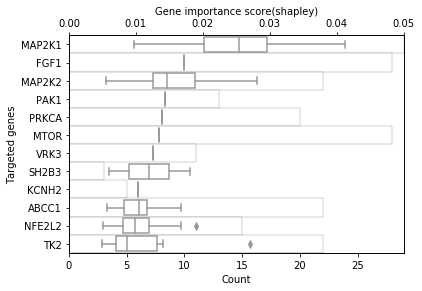

In [104]:
# plot enriched genes
enriched_genes = gene_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(12).index
_df = gene_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False)
_df['Approved symbol'] = _df.index


ax1 = sns.histplot(data=gene_score,y='Approved symbol',color='white')
ax2 = ax1.twiny()
ax2 = sns.boxplot(data=gene_score,\
            y='Approved symbol',x='score',\
           order = enriched_genes,orient='h',color='white')
ax1.set(xlabel='Count', ylabel='Targeted genes')
ax2.set(xlabel='Gene importance score(shapley)', ylabel='Targeted genes')
ax1.set_xlim(0,29)
ax2.set_xlim(0,0.05)

In [105]:
enriched_genes_pway = gene_score.groupby("gene").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(100).index
for i in enriched_genes_pway: print(int(i))

5604
2246
5605
5058
5578
2475
51231
10019
3757
4363
4780
7084
6470
2350
5467
3094
1555
7157
3177
3417
10599
81027
1558
7150
5594
6714
23411
2740
6311
7048
11201
51727
5753
3064
4907
7153
9154
3309
5788
8202
368
10257
51053
4830
8654
7277
2671
1111
3065
89845
8648
2950
7364
1548
50488
151
7155
1635
2744
3043
328
3725
6583
28232
6795
2908
7066
7298
5376
28234
23097
1588
6788
4129
213
6582
56655
5742
43
590
4661
6777
2030
4790
1577
5288
5321
1131
874
4128
10327
3156
9356
5743
780
5644
5530
4538
54600
3932


### genes exp values

In [120]:
# m_shap_syn = m_shap[m_shap.drug1_Name.isin(highly_predicted_drugs)]

In [74]:
lowly_predicted_drugs = m_shap.groupby("drug1_Name").predicts_transynergy_liu.agg(["mean"]).\
rename(columns="{}_of_drug1".format).\
sort_values("mean_of_drug1", ascending=False).tail(12).index

In [75]:
lowly_predicted_drugs

Index(['Doxorubicin Hydrochloride', 'Telatinib', 'Dapagliflozin',
       'Tocris-1479', 'Palomid 529', 'AZD1480', 'ARN-509', 'Lenvatinib',
       'Danusertib', '761439-42-3', 'TOPOTECAN HYDROCHLORIDE', 'mitomycin C'],
      dtype='object', name='drug1_Name')

In [88]:
m_shap_partial = m_shap[m_shap['drug1_Name'] == 'Doxorubicin Hydrochloride']
m_shap_partial = m_shap_partial[m_shap_partial.drug1_Name.isin(lowly_predicted_drugs)]
m_shap_partial_syn = m_shap_partial[m_shap_partial['predicts_transynergy_liu'] > 0.5]
m_shap_partial_an = m_shap_partial[m_shap_partial['predicts_transynergy_liu'] <= 0.5]

In [89]:
cell_gene_list = []
cell_score_list = []
# #
_pack = m_shap_partial['cell_gene'].values
_pack_score = m_shap_partial['cell_score'].values
for idx in range(len(_pack)):
    _unpack = [x for x in _pack[idx].strip("[]").split(" ")]
    _unpack_score = [x for x in _pack_score[idx].strip("[]").split(" ")]
    # remove empty string in a list
    str_list = list(filter(None, _unpack))
    str_score_list = list(filter(None, _unpack_score))
    
    counter = 0
    for j, (x, y) in enumerate(zip(str_list, str_score_list)):
        if counter <= 20:
            cell_gene_list.append(float(x))
            cell_score_list.append(float(y))
            counter += 1

In [90]:
gene_score = pd.DataFrame([cell_gene_list,cell_score_list]).T
gene_score.columns = ['gene','score']
#map gene name
ncbi2symbol = pd.read_csv("ncbi2symbol.txt",sep='\t')
# ncbiID_to_Name= dict(zip(list(ncbi2symbol['NCBI Gene ID(supplied by NCBI)']), list(ncbi2symbol['Approved symbol'])))
gene_score = pd.merge(gene_score,ncbi2symbol,left_on='gene',right_on='NCBI Gene ID(supplied by NCBI)')
gene_score

,gene,score,Approved symbol,NCBI Gene ID(supplied by NCBI)
0,973.0,0.002475,CD79A,973.0
1,973.0,0.003376,CD79A,973.0
2,973.0,0.003670,CD79A,973.0
3,973.0,0.003365,CD79A,973.0
4,973.0,0.002951,CD79A,973.0
...,...,...,...,...
604,7462.0,0.000749,LAT2,7462.0
605,2572.0,0.001090,GAD2,2572.0
606,2045.0,0.000821,EPHA7,2045.0
607,4306.0,0.000806,NR3C2,4306.0


[[]]

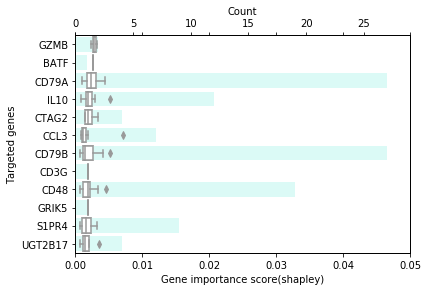

In [91]:
# plot enriched genes
enriched_genes = gene_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(12).index
_df = gene_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False)
_df['Approved symbol'] = _df.index



ax1 = sns.boxplot(data=gene_score,\
            y='Approved symbol',x='score',\
           order = enriched_genes,orient='h',color='white')

ax2 = ax1.twiny()
ax2 = sns.countplot(data=gene_score,y='Approved symbol',order=enriched_genes,color='#d6fffa')
ax3 = ax1.twiny()
ax3 = sns.boxplot(data=gene_score,\
            y='Approved symbol',x='score',\
           order = enriched_genes,orient='h',color='white')

ax1.set(xlabel='Gene importance score(shapley)', ylabel='Targeted genes')
ax2.set(xlabel='Count', ylabel='Targeted genes')
ax1.set_xlim(0,0.05)
ax2.set_xlim(0,29)
ax3.set_xlim(0,0.05)
ax3.set(xlabel='', ylabel='')
ax3.set(xticklabels=[])

In [92]:
enriched_genes_pway = gene_score.groupby("gene").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(12).index
for i in enriched_genes_pway: print(int(i))

3002
10538
973
3586
30848
6348
974
917
962
2901
8698
7367


In [93]:
# need to draw real- cell line expression value 

In [94]:
columbia_exp = pd.read_csv("../synergyy/data/cell_line_data/Customized/orginal_columbia_DLBC_exp_20221014.csv",sep=',')

In [95]:
#columbia_exp[m_shap_partial_syn['cell_x']]
columbia_exp.loc[enriched_genes_pway,]

,BJAB_GCB_EL001,DB_GCB_EL002,DOHH2_GCB_EL003,FARAGE_GCB_EL004,HBL1_ABC_EL005,HT_GCB_EL006,KARPAS_422_GCB_EL007,OCI-LY10_ABC_EL008,OCI-LY18_GCB_EL009,OCI-LY1_GCB_EL010,...,SUDHL6_GCB_EL020,SUDHL16_GCB_EL021,U2932_ABC_EL022,TOLEDO_GCB_EL023,HLY1_ABC_EL024,TMD8_ABC_EL025,RL_GCB_EL026,SUDHL2_ABC_EL027,LY3_ABC_EL028,PFEIFFER_GCB_EL029
3002,0.000000,0.000000,0.061016,0.000000,4.277181,0.000000,0.000000,4.189216,0.034497,0.000000,...,0.163499,0.084745,0.331132,0.204015,0.785425,9.481687,0.135666,0.802979,0.052972,0.804880
10538,1.198054,0.343919,3.572720,6.531374,6.557392,0.115300,0.187008,8.605338,1.150040,0.333538,...,5.500123,0.258217,6.517787,0.864176,6.185193,7.833960,1.356707,8.225791,8.234637,7.287771
973,8.440221,9.025275,7.307525,8.679721,9.004112,8.083682,7.413575,6.962851,6.916385,8.530039,...,8.576107,6.952303,8.095862,7.793568,0.581496,8.080126,8.400171,6.880666,6.900223,4.581634
3586,4.411996,0.120883,0.145482,4.429261,3.205048,0.843823,0.029983,6.534443,0.045024,0.119024,...,0.066399,3.785027,3.219261,0.087055,4.364432,4.553047,0.255319,3.803134,5.553655,2.664665
30848,0.000000,0.000000,0.000000,0.000000,6.734615,0.000000,0.000000,7.285318,0.095992,0.128689,...,0.071900,0.202136,0.073683,0.147828,7.398264,0.159758,0.049631,1.432211,0.000000,0.552869
6348,0.169668,0.353323,3.687173,0.585636,2.958434,0.576667,2.009347,9.042394,0.829362,0.086784,...,0.767740,0.801407,2.649225,3.670127,3.652865,0.302875,1.551688,2.653794,1.752492,2.274351
974,8.331412,8.417702,5.943499,5.807368,9.082018,7.619719,7.548786,7.091928,8.813540,9.167502,...,7.957368,7.558631,7.613115,8.554510,1.197362,7.566197,8.434246,5.131120,6.675225,9.818447
917,0.121015,0.028003,0.022758,0.000000,0.076833,0.145743,6.784937,0.013212,0.025454,0.000000,...,0.000000,0.015926,0.000000,0.039700,0.225152,0.000000,0.326307,0.051024,0.000000,0.192699
962,4.018937,6.244845,6.259436,6.595052,3.615828,2.465139,0.815166,5.846441,1.804095,4.035756,...,6.327905,0.082294,5.695409,5.586996,6.800622,5.210946,6.095072,5.369899,4.439384,1.684729
2901,0.093560,0.114634,0.169412,0.026588,0.047538,0.068740,0.063641,2.786074,0.057831,0.019915,...,0.019346,0.263034,0.128689,0.153416,0.022474,0.019915,0.313478,0.114634,0.088413,0.082566


[Text(0, 0.5, 'Targeted genes (Entrez ID)'),
 Text(0.5, 0, 'Gene exp value: log(TPM+1)')]

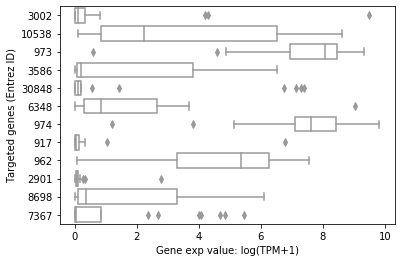

In [96]:
ax3 = sns.boxplot(columbia_exp[m_shap_partial_an['cell_x']].loc[enriched_genes_pway,].T,color='white',orient='h')
ax3.set(xlabel='Gene exp value: log(TPM+1)', ylabel='Targeted genes (Entrez ID)')
# ax3.set_xlim(0,10.0)

##### irbutinib

In [33]:
d2tg_gene_list = []
d2tg_score_list = []
# #
_pack = m_shap['d2tg_gene'].values
_pack_score = m_shap['d2tg_score'].values
for idx in range(len(_pack)):
    _unpack = [x for x in _pack[idx].strip("[]").split(" ")]
    _unpack_score = [x for x in _pack_score[idx].strip("[]").split(" ")]
    # remove empty string in a list
    str_list = list(filter(None, _unpack))
    str_score_list = list(filter(None, _unpack_score))
    
    counter = 0
    for j, (x, y) in enumerate(zip(str_list, str_score_list)):
        if counter <= 20:
            d2tg_gene_list.append(float(x))
            d2tg_score_list.append(float(y))
            counter += 1

In [34]:
irbutinib_score = pd.DataFrame([d2tg_gene_list,d2tg_score_list]).T
irbutinib_score.columns = ['gene','score']
#map gene name
ncbi2symbol = pd.read_csv("ncbi2symbol.txt",sep='\t')
irbutinib_score = pd.merge(irbutinib_score,ncbi2symbol,left_on='gene',right_on='NCBI Gene ID(supplied by NCBI)')
irbutinib_score

,gene,score,Approved symbol,NCBI Gene ID(supplied by NCBI)
0,2066.0,0.011166,ERBB4,2066.0
1,2066.0,0.025002,ERBB4,2066.0
2,2066.0,0.022438,ERBB4,2066.0
3,2066.0,0.012594,ERBB4,2066.0
4,2066.0,0.012384,ERBB4,2066.0
...,...,...,...,...
128977,10057.0,0.002222,ABCC5,10057.0
128978,1633.0,0.002027,DCK,1633.0
128979,23411.0,0.004066,SIRT1,23411.0
128980,2932.0,0.002923,GSK3B,2932.0


(0, 0.05)

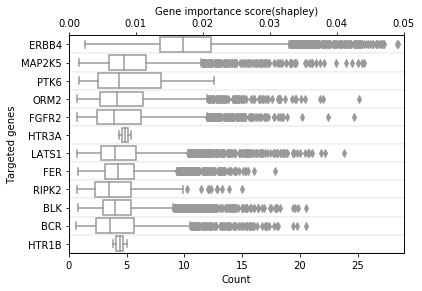

In [35]:
# plot enriched genes
enriched_genes = irbutinib_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(12).index
_df = irbutinib_score.groupby("Approved symbol").score.agg(["mean","count"]).\
sort_values("mean", ascending=False)
_df['Approved symbol'] = _df.index


ax1 = sns.histplot(data=irbutinib_score,y='Approved symbol',color='white')
ax2 = ax1.twiny()
ax2 = sns.boxplot(data=irbutinib_score,\
            y='Approved symbol',x='score',\
           order = enriched_genes,orient='h',color='white')
ax1.set(xlabel='Count', ylabel='Targeted genes')
ax2.set(xlabel='Gene importance score(shapley)', ylabel='Targeted genes')
ax1.set_xlim(0,29)
ax2.set_xlim(0,0.05)

In [102]:
enriched_genes_pway = gene_score.groupby("gene").score.agg(["mean","count"]).\
sort_values("mean", ascending=False).head(50).index
for i in enriched_genes_pway: print(int(i))

5605
5604
1111
9149
10298
4140
5293
3480
238
1460
6822
55589
6790
5305
5979
5292
4751
5601
23683
6580
7465
9439
1196
5156
367
25865
10599
1859
4058
28234
5747
57118
4915
9448
9475
5243
1436
5588
7084


In [64]:
# dpi
dpi = pd.read_csv("../synergyy/results/proessed_dpi.csv",index_col=0)

In [66]:
counter = 0
for i in dpi.loc[:,"11747"][dpi.loc[:,"11747"]!=0].index: 
    counter+= 1 
    print(i)
print(counter)

25
2321
2322
5159
90
238
3791
3815
5562
10188
2534
3932
5156
1436
3480
5604
1020
6790
6093
1432
4914
2932
5602
5578
5292
695
5588
3055
1022
2260
1025
1024
3717
5979
5747
1111
9212
3718
4915
5566
5601
1613
5599
4751
1459
1859
815
6446
9475
4067
57118
6795
5605
3984
6197
1460
8428
6788
57551
29110
7301
10645
1196
57396
1452
9149
2931
9641
120892
4058
5607
4294
5871
9448
11183
4140
57787
9833
4486
4916
10298
8767
6098
23235
4233
10110
5613
2869
23683
89


In [71]:
enriched_genes_pway.intersection(dpi.loc[:,"11747"][dpi.loc[:,"11747"]!=0].index)

Index([], dtype='object')